# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов.
В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Нужно проанализировать поведение клиентов и сделать вывод — **какой тариф лучше**.

---
## Шаг 1. Открываем файлы с данными и изучаем общую информацию

**Импорт библиотек и настройки**

In [ ]:
from scipy import stats as st

import pandas as pd
import numpy as np 

import math
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',40)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Таблица users (информация о пользователях)

In [ ]:
df_users = pd.read_csv('/datasets/users.csv')

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
df_users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
263,1263,32,NaN,Балашиха,Ермолай,Зайцев,2018-04-30,smart
31,1031,66,NaN,Москва,Лаврентий,Тимофеев,2018-11-02,smart
431,1431,70,NaN,Уфа,Елена,Тимофеева,2018-03-16,smart
351,1351,39,NaN,Казань,Анфиса,Вешнякова,2018-11-16,smart
89,1089,19,NaN,Иркутск,Ксения,Нечаева,2018-02-24,ultra


In [ ]:
df_users.duplicated().sum()

0

* дубликаты отсутствуют
* churn_date - присутствуют пропущенные данные, которые означают, что тариф ещё действовал на момент выгрузки данных. Оставим без изменения. Заменим тип данных на дату 
* reg_date - заменим тип данных на дату 

### Таблица calls (информация о звонках)

In [ ]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
df_calls.sample(5)

,id,call_date,duration,user_id
35723,1089_196,2018-03-31,8.50,1089
147773,1375_604,2018-12-13,1.69,1375
142510,1360_953,2018-04-24,3.09,1360
54582,1138_7,2018-10-20,16.92,1138
89996,1225_256,2018-12-26,0.00,1225


In [ ]:
df_calls.duplicated().sum()

0

* дубликаты отсутствуют
* пропуски отсутствуют
* call_date - заменим тип данных на дату 

### Таблица messages (информация о сообщениях)

In [ ]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [ ]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
df_messages.sample(5)

,id,message_date,user_id
37249,1161_141,2018-08-03,1161
16361,1070_52,2018-10-26,1070
13913,1058_5,2018-11-06,1058
61376,1270_249,2018-11-04,1270
6591,1028_246,2018-12-01,1028


In [ ]:
df_messages.duplicated().sum()

0

* дубликаты отсутствуют
* пропуски отсутствуют
* message_date - заменим тип данных на дату 

### Таблица internet (информация об интернет-сессиях)

In [ ]:
df_internet = pd.read_csv('/datasets/internet.csv')

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [ ]:
df_internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
114958,114958,1387_45,317.86,2018-12-30,1387
71789,71789,1243_6,168.46,2018-06-06,1243
124432,124432,1419_152,258.45,2018-09-06,1419
74784,74784,1251_346,977.00,2018-03-17,1251
67592,67592,1228_377,455.08,2018-06-17,1228


при чтении файла укажем индекс

In [ ]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)

In [ ]:
df_internet.sample(5)

,id,mb_used,session_date,user_id
147622,1494_61,158.79,2018-11-30,1494
116868,1393_354,0.00,2018-06-04,1393
120243,1404_338,0.00,2018-08-07,1404
36968,1127_318,314.39,2018-06-01,1127
51828,1175_481,61.44,2018-09-28,1175


In [ ]:
df_internet.duplicated().sum()

0

* дубликаты отсутствуют
* пропуски отсутствуют
* session_date - заменим тип данных на дату 

### Таблица tariffs (информация о тарифах)

In [ ]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [ ]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


* обработки не требуется

**Вывод**

* пропуски в файлах отсутствуют
* требуется замена типов данных

---
## Шаг 2. Подготавливаем данные

### Изменение типов данных

**Таблица users**

Переведем churn_date из строки в дату

In [ ]:
df_users.loc[19, 'churn_date']

'2018-10-05'

In [ ]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [ ]:
df_users.loc[19, 'churn_date']

Timestamp('2018-10-05 00:00:00')

Переведем reg_date из строки в дату

In [ ]:
df_users.loc[1, 'reg_date']

'2018-11-01'

In [ ]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [ ]:
df_users.loc[1, 'reg_date']

Timestamp('2018-11-01 00:00:00')

In [ ]:
df_users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

**Таблица calls**

Переведем call_date из строки в дату

In [ ]:
df_calls.loc[1, 'call_date']

'2018-08-17'

In [ ]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [ ]:
df_calls.loc[1, 'call_date']

Timestamp('2018-08-17 00:00:00')

In [ ]:
df_calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

**Таблица messages**

Переведем message_date из строки в дату

In [ ]:
df_messages.loc[1, 'message_date']

'2018-10-08'

In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [ ]:
df_messages.loc[1, 'message_date']

Timestamp('2018-10-08 00:00:00')

In [ ]:
df_messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

**Таблица internet**

Переведем session_date из строки в дату

In [ ]:
df_internet.loc[1, 'session_date']

'2018-09-07'

In [ ]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [ ]:
df_internet.loc[1, 'session_date']

Timestamp('2018-09-07 00:00:00')

In [ ]:
df_internet.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

### округление данных

**Таблица calls**

округляем секунды до минут, каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

<div class="alert alert-info">
воспользуемся функцией np.ceil()  
</div>

In [ ]:
df_calls['duration_min']=np.ceil(df_calls['duration'])

### Расчеты для пользователей

сформируем списки столбцов

In [ ]:
columns_calls_duration=[]
columns_messages_count=[]
columns_internet_gb=[]

for m in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    columns_calls_duration.append('calls_duration_' + m)
    columns_messages_count.append('messages_count_' + m)
    columns_internet_gb.append('internet_gb_' + m)

#### расчет кол-ва сделанных звонков и израсходованных минут разговора по месяцам

добавим столбец call_month с номером месяца

In [ ]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls.head()

,id,call_date,duration,user_id,duration_min,month
0,1000_0,2018-07-25,0.00,1000,0.00,7
1,1000_1,2018-08-17,0.00,1000,0.00,8
2,1000_2,2018-06-11,2.85,1000,3.00,6
3,1000_3,2018-09-21,13.80,1000,14.00,9
4,1000_4,2018-12-15,5.18,1000,6.00,12


расчитаем кол-во звонков по месяцам

In [ ]:
data_calls_count = df_calls.pivot_table(index='user_id', columns='month', aggfunc={'id':'count'})

переименуем столбцы

In [ ]:
data_calls_count.columns = ['calls_count_01','calls_count_02','calls_count_03','calls_count_04','calls_count_05','calls_count_06','calls_count_07','calls_count_08','calls_count_09','calls_count_10','calls_count_11','calls_count_12']
data_calls_count.head()

,calls_count_01,calls_count_02,calls_count_03,calls_count_04,calls_count_05,calls_count_06,calls_count_07,calls_count_08,calls_count_09,calls_count_10,calls_count_11,calls_count_12
user_id,,,,,,,,,,,,
1000,nan,nan,nan,nan,22.00,43.00,47.00,52.00,58.00,57.00,43.00,46.00
1001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,59.00,63.00
1002,nan,nan,nan,nan,nan,15.00,26.00,42.00,36.00,33.00,32.00,33.00
1003,nan,nan,nan,nan,nan,nan,nan,55.00,134.00,108.00,115.00,108.00
1004,nan,nan,nan,nan,9.00,31.00,22.00,19.00,26.00,29.00,19.00,21.00


расчитаем длительность звонков по месяцам и переименуем столбцы

In [ ]:
data_calls_duration = df_calls.pivot_table(index='user_id', columns='month', aggfunc={'duration_min':['sum']})
data_calls_duration.columns = columns_calls_duration
data_calls_duration.head()

,calls_duration_01,calls_duration_02,calls_duration_03,calls_duration_04,calls_duration_05,calls_duration_06,calls_duration_07,calls_duration_08,calls_duration_09,calls_duration_10,calls_duration_11,calls_duration_12
user_id,,,,,,,,,,,,
1000,nan,nan,nan,nan,159.00,172.00,340.00,408.00,466.00,350.00,338.00,333.00
1001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,430.00,414.00
1002,nan,nan,nan,nan,nan,117.00,214.00,289.00,206.00,212.00,243.00,236.00
1003,nan,nan,nan,nan,nan,nan,nan,380.00,961.00,855.00,824.00,802.00
1004,nan,nan,nan,nan,35.00,171.00,135.00,137.00,117.00,145.00,117.00,130.00


длительность звонков добавим в таблицу df_users

In [ ]:
df_users = df_users.merge(data_calls_duration, on = 'user_id', how='left')

In [ ]:
data_calls_duration.describe()

,calls_duration_01,calls_duration_02,calls_duration_03,calls_duration_04,calls_duration_05,calls_duration_06,calls_duration_07,calls_duration_08,calls_duration_09,calls_duration_10,calls_duration_11,calls_duration_12
count,43.00,82.00,114.00,165.00,205.00,244.00,289.00,337.00,370.00,411.00,444.00,470.00
mean,250.79,298.23,422.38,401.88,433.22,431.07,455.87,456.08,468.85,471.84,473.17,518.46
std,202.66,224.92,249.89,216.90,227.33,224.71,232.03,232.01,236.46,239.67,225.53,249.58
min,0.00,0.00,13.00,0.00,2.00,1.00,0.00,0.00,0.00,9.00,6.00,9.00
25%,87.50,103.75,237.25,247.00,284.00,272.75,295.00,297.00,302.25,310.50,314.00,343.25
50%,230.00,238.50,407.50,389.00,449.00,425.50,454.00,450.00,456.50,451.00,462.50,492.50
75%,364.50,460.25,549.25,550.00,561.00,564.75,589.00,600.00,597.75,596.50,603.25,645.00
max,861.00,919.00,1609.00,1096.00,1232.00,1410.00,1311.00,1321.00,1297.00,1401.00,1257.00,1673.00


#### кол-во отправленных сообщений по месяцам

добавим столбец month с номером месяца

In [ ]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


расчитаем кол-во сообщений по месяцам и переименуем столбцы

In [ ]:
data_messages_count = df_messages.pivot_table(index='user_id', columns='month', aggfunc={'id':'count'})
data_messages_count.columns = columns_messages_count
data_messages_count.head()

,messages_count_01,messages_count_02,messages_count_03,messages_count_04,messages_count_05,messages_count_06,messages_count_07,messages_count_08,messages_count_09,messages_count_10,messages_count_11,messages_count_12
user_id,,,,,,,,,,,,
1000,nan,nan,nan,nan,22.00,60.00,75.00,81.00,57.00,73.00,58.00,70.00
1002,nan,nan,nan,nan,nan,4.00,11.00,13.00,4.00,10.00,16.00,12.00
1003,nan,nan,nan,nan,nan,nan,nan,37.00,91.00,83.00,94.00,75.00
1004,nan,nan,nan,nan,95.00,134.00,181.00,151.00,146.00,165.00,158.00,162.00
1005,7.00,38.00,56.00,41.00,42.00,47.00,56.00,64.00,52.00,44.00,51.00,54.00


результат добавим в таблицу df_users

In [ ]:
df_users = df_users.merge(data_messages_count, on = 'user_id', how='left')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_duration_01,calls_duration_02,calls_duration_03,calls_duration_04,calls_duration_05,calls_duration_06,calls_duration_07,calls_duration_08,calls_duration_09,calls_duration_10,calls_duration_11,calls_duration_12,messages_count_01,messages_count_02,messages_count_03,messages_count_04,messages_count_05,messages_count_06,messages_count_07,messages_count_08,messages_count_09,messages_count_10,messages_count_11,messages_count_12
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,nan,nan,nan,nan,159.00,172.00,340.00,408.00,466.00,350.00,338.00,333.00,nan,nan,nan,nan,22.00,60.00,75.00,81.00,57.00,73.00,58.00,70.00
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,430.00,414.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,nan,nan,nan,nan,nan,117.00,214.00,289.00,206.00,212.00,243.00,236.00,nan,nan,nan,nan,nan,4.00,11.00,13.00,4.00,10.00,16.00,12.00
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,nan,nan,nan,nan,nan,nan,nan,380.00,961.00,855.00,824.00,802.00,nan,nan,nan,nan,nan,nan,nan,37.00,91.00,83.00,94.00,75.00
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,nan,nan,nan,nan,35.00,171.00,135.00,137.00,117.00,145.00,117.00,130.00,nan,nan,nan,nan,95.00,134.00,181.00,151.00,146.00,165.00,158.00,162.00


#### объем израсходованного интернет-трафика по месяцам

добавим столбец month с номером месяца

In [ ]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


расчитаем объем трафика по месяцам и переименуем столбцы

In [ ]:
data_internet_mb = df_internet.pivot_table(index='user_id', columns='month', aggfunc={'mb_used':'sum'})
data_internet_mb.head()

mb_used                                                                \
month        1   2   3   4         5         6         7         8         9    
user_id                                                                         
1000        NaN NaN NaN NaN   2253.49  23233.77  14003.64  14055.93  14568.91   
1001        NaN NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
1002        NaN NaN NaN NaN       NaN  10856.82  17580.10  20319.26  16691.08   
1003        NaN NaN NaN NaN       NaN       NaN       NaN   8565.21  12468.87   
1004        NaN NaN NaN NaN  13403.98  17600.02  22229.58  28584.37  15109.03   

                                       
month          10        11        12  
user_id                                
1000     14702.49  14756.47   9817.61  
1001          NaN  18429.34  14036.66  
1002     13888.25  18587.28  18113.73  
1003     14768.14  11356.89  10121.53  
1004     18475.44  15616.02  18021.04

In [ ]:
data_internet_mb=data_internet_mb.fillna(0)

мегабайты округляются — до гигабайт. общая сумма за месяц округляется в бо́льшую сторону.

In [ ]:
data_internet_mb = data_internet_mb/1024
data_internet_gb=np.ceil(data_internet_mb)
data_internet_gb.columns = columns_internet_gb
data_internet_gb.head()

,internet_gb_01,internet_gb_02,internet_gb_03,internet_gb_04,internet_gb_05,internet_gb_06,internet_gb_07,internet_gb_08,internet_gb_09,internet_gb_10,internet_gb_11,internet_gb_12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0
1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0,15.0,12.0,10.0
1004,0.0,0.0,0.0,0.0,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0


результат добавим в таблицу df_users

In [ ]:
df_users = df_users.merge(data_internet_gb, on = 'user_id', how='left')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_duration_01,calls_duration_02,...,internet_gb_03,internet_gb_04,internet_gb_05,internet_gb_06,internet_gb_07,internet_gb_08,internet_gb_09,internet_gb_10,internet_gb_11,internet_gb_12
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,...,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,...,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,9.0,13.0,15.0,12.0,10.0
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,...,0.0,0.0,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0


#### проанализируем полученные данные по времени звонков, сообщениям и трафику

избавимся от пропущенных значений в новых столбцах

In [ ]:
df_users[columns_calls_duration]=df_users[columns_calls_duration].fillna(0)
df_users[columns_messages_count]=df_users[columns_messages_count].fillna(0)
df_users[columns_internet_gb]=df_users[columns_internet_gb].fillna(0)

изучим числовое описание данных по времени звонков

In [ ]:
df_users[columns_calls_duration].describe()

,calls_duration_01,calls_duration_02,calls_duration_03,calls_duration_04,calls_duration_05,calls_duration_06,calls_duration_07,calls_duration_08,calls_duration_09,calls_duration_10,calls_duration_11,calls_duration_12
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,21.568000,48.910000,96.302000,132.620000,177.620000,210.360000,263.492000,307.396000,346.9500,387.856000,420.178000,487.350000
std,91.710146,142.935563,213.554531,226.367029,258.102673,266.663641,286.118657,286.428731,289.3541,282.557237,259.749182,271.546273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,174.750000,253.750000,307.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,204.500000,302.500000,342.5000,378.000000,422.000000,479.500000
75%,0.000000,0.000000,0.000000,234.000000,371.000000,416.750000,493.000000,508.250000,539.0000,558.500000,581.000000,631.750000
max,861.000000,919.000000,1609.000000,1096.000000,1232.000000,1410.000000,1311.000000,1321.000000,1297.0000,1401.000000,1257.000000,1673.000000


изучим числовое описание данных по кол-ву сообщений

In [ ]:
df_users[columns_messages_count].describe()

,messages_count_01,messages_count_02,messages_count_03,messages_count_04,messages_count_05,messages_count_06,messages_count_07,messages_count_08,messages_count_09,messages_count_10,messages_count_11,messages_count_12
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.848000,3.848000,7.296000,10.358000,14.59600,17.966000,22.640000,26.176000,29.518000,34.228000,36.488000,41.110000
std,8.499729,12.761921,20.372099,22.375145,26.85448,30.500581,33.864258,34.696985,35.338127,38.444974,37.497921,39.700809
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,11.500000,18.000000,25.000000,27.000000,31.000000
75%,0.000000,0.000000,0.000000,6.000000,21.25000,27.250000,38.000000,42.000000,49.000000,53.250000,57.250000,63.000000
max,75.000000,90.000000,155.000000,143.000000,148.00000,201.000000,211.000000,180.000000,188.000000,223.000000,197.000000,224.000000


изучим числовое описание данных по интернет трафику

In [ ]:
df_users[columns_internet_gb].describe()

,internet_gb_01,internet_gb_02,internet_gb_03,internet_gb_04,internet_gb_05,internet_gb_06,internet_gb_07,internet_gb_08,internet_gb_09,internet_gb_10,internet_gb_11,internet_gb_12
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.832000,1.950000,3.65200,4.918000,7.082000,8.41400,10.114000,12.060000,12.950000,14.862000,16.052000,18.312000
std,3.313266,5.356948,7.66475,8.111156,9.692015,9.85926,10.319398,10.244917,9.510647,9.351034,8.504702,8.247345
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9.000000,11.000000,14.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,10.000000,14.000000,14.000000,16.000000,17.000000,18.000000
75%,0.000000,0.000000,0.00000,10.000000,15.000000,17.00000,18.000000,19.000000,20.000000,21.000000,21.000000,23.000000
max,24.000000,32.000000,37.00000,37.000000,43.000000,42.00000,45.000000,48.000000,42.000000,49.000000,44.000000,43.000000


* сильные пики для 0 по всем наборам данных. Особенно в первой половине года.
* Может быть связано с отсутствием активности пользователей в эти месяцы, либо с ошибкой получения данных.
* при построении гистограмм минимальное значение примем за 1

#### помесячная выручка с каждого пользователя

расчитываем выручку

In [ ]:
# новые столбцы с выручкой
columns_revenue=[]
for m in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    columns_revenue.append('revenue_' + m)
#print(columns_revenue)

In [ ]:
#на входе строка из таблицы df_users
# на выходе список выручки по месячно с пользователя
def func_revenue(row):
    row_result = []
    tariff = row['tariff']
    
    #инициализируем переменные в соответствии с тарифом
    minutes_included = df_tariffs[df_tariffs['tariff_name']== tariff]['minutes_included'].iloc[0]
    messages_included = df_tariffs[df_tariffs['tariff_name']== tariff]['messages_included'].iloc[0]
    gb_per_month_included = df_tariffs[df_tariffs['tariff_name']== tariff]['mb_per_month_included'].iloc[0]/1024
    rub_per_minute = df_tariffs[df_tariffs['tariff_name']== tariff]['rub_per_minute'].iloc[0]
    rub_per_message = df_tariffs[df_tariffs['tariff_name']== tariff]['rub_per_message'].iloc[0]
    rub_per_gb = df_tariffs[df_tariffs['tariff_name']== tariff]['rub_per_gb'].iloc[0]
    rub_monthly_fee = df_tariffs[df_tariffs['tariff_name']== tariff]['rub_monthly_fee'].iloc[0]
    
    #выручка , инициализируем абонентской платой за месяц для пользователя
    revenue = rub_monthly_fee   
    
    #каждый проход цикла это расчет выручки для конкретного месяца
    for m in ['01','02','03','04','05','06','07','08','09','10','11','12']: 
        calls_duration_name = 'calls_duration' + '_' + m
        messages_count_name = 'messages_count' + '_' + m
        internet_gb_name = 'internet_gb' + '_' + m
        
        if row[calls_duration_name] > minutes_included:
            revenue += (row[calls_duration_name] - minutes_included)*rub_per_minute
        if row[messages_count_name] > messages_included:
            revenue += (row[messages_count_name] - messages_included)*rub_per_message
        if row[internet_gb_name] > gb_per_month_included:
            revenue += (row[internet_gb_name] - gb_per_month_included)*rub_per_gb
        
        #округление до копеек
        row_result.append(round(revenue,2))

    return row_result

применяем функцию расчета выручки к df_users

In [ ]:
df_users[columns_revenue]=df_users.apply(func_revenue,axis=1,result_type='expand')

In [ ]:
df_users[columns_revenue].head()

,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,1150.0,1150.0
2,550.0,550.0,550.0,550.0,550.0,550.0,1150.0,2150.0,2550.0,2550.0,3350.0,3950.0
3,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
4,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0


---
## Шаг 3. Проанализируем данные

### Расчет среднего количества, дисперсии и стандартного отклонения по месяцам

#### минуты разговора

среднее

In [ ]:
df_users.pivot_table(index='tariff',values=columns_calls_duration, aggfunc=['mean'])

mean                                      \
       calls_duration_01 calls_duration_02 calls_duration_03   
tariff                                                         
smart          19.746439         49.356125         85.566952   
ultra          25.859060         47.859060        121.590604   

                                                              \
       calls_duration_04 calls_duration_05 calls_duration_06   
tariff                                                         
smart         117.148148        155.606838        184.857550   
ultra         169.067114        229.476510        270.436242   

                                                              \
       calls_duration_07 calls_duration_08 calls_duration_09   
tariff                                                         
smart         233.843305        282.179487        317.490028   
ultra         333.335570        366.798658        416.348993   

                                                              
       calls_duration_10 calls_duration_11 calls_duration_12  
tariff                                                        
smart         356.934473        391.863248        459.472934  
ultra         460.697987        486.879195        553.020134

дисперсия

In [ ]:
df_users.pivot_table(index='tariff',values=columns_calls_duration, aggfunc=[np.var])

var                                      \
       calls_duration_01 calls_duration_02 calls_duration_03   
tariff                                                         
smart        5888.641237      18271.298527      34124.177648   
ultra       14405.621894      25673.432705      72148.405587   

                                                              \
       calls_duration_04 calls_duration_05 calls_duration_06   
tariff                                                         
smart       40398.703704      50093.702125      53393.516793   
ultra       75326.184654     102285.940323     108309.882732   

                                                              \
       calls_duration_07 calls_duration_08 calls_duration_09   
tariff                                                         
smart       59353.298234      62678.679121      60196.924900   
ultra      128655.670415     123325.445674     133027.039543   

                                                              
       calls_duration_10 calls_duration_11 calls_duration_12  
tariff                                                        
smart       54399.444265      45501.181245      46906.107123  
ultra      132928.779793     113497.444767     131503.168511

стандартное отклонение

In [ ]:
df_users.pivot_table(index='tariff',values=columns_calls_duration, aggfunc=[np.std])

std                                      \
       calls_duration_01 calls_duration_02 calls_duration_03   
tariff                                                         
smart          76.737483        135.171367        184.727306   
ultra         120.023422        160.229313        268.604552   

                                                              \
       calls_duration_04 calls_duration_05 calls_duration_06   
tariff                                                         
smart         200.994288        223.816224        231.070372   
ultra         274.456162        319.821732        329.104668   

                                                              \
       calls_duration_07 calls_duration_08 calls_duration_09   
tariff                                                         
smart         243.625323        250.357103        245.350616   
ultra         358.686033        351.177228        364.728720   

                                                              
       calls_duration_10 calls_duration_11 calls_duration_12  
tariff                                                        
smart         233.236884        213.310059        216.578178  
ultra         364.593993        336.893818        362.633656

#### кол-во сообщений

среднее

In [ ]:
df_users.pivot_table(index='tariff',values=columns_messages_count, aggfunc=['mean'])

mean                                      \
       messages_count_01 messages_count_02 messages_count_03   
tariff                                                         
smart           1.766382          3.980057          6.988604   
ultra           2.040268          3.536913          8.020134   

                                                              \
       messages_count_04 messages_count_05 messages_count_06   
tariff                                                         
smart           9.809117         13.566952         15.606838   
ultra          11.651007         17.020134         23.523490   

                                                              \
       messages_count_07 messages_count_08 messages_count_09   
tariff                                                         
smart          19.327635         22.521368         24.917379   
ultra          30.442953         34.785235         40.355705   

                                                              
       messages_count_10 messages_count_11 messages_count_12  
tariff                                                        
smart          28.282051         30.678063         34.558405  
ultra          48.234899         50.174497         56.543624

дисперсия

In [ ]:
df_users.pivot_table(index='tariff',values=columns_messages_count, aggfunc=[np.var])

var                                      \
       messages_count_01 messages_count_02 messages_count_03   
tariff                                                         
smart          53.910981        157.299601        330.308441   
ultra         116.038908        176.993561        617.411754   

                                                              \
       messages_count_04 messages_count_05 messages_count_06   
tariff                                                         
smart         396.874888        567.314790        654.267839   
ultra         747.039543       1081.438781       1545.021404   

                                                              \
       messages_count_07 messages_count_08 messages_count_09   
tariff                                                         
smart         736.649491        811.518828        802.984583   
ultra        2037.140305       2033.602213       2143.028025   

                                                              
       messages_count_10 messages_count_11 messages_count_12  
tariff                                                        
smart         838.723077        829.881775        947.310151  
ultra        2718.478233       2509.617994       2732.330854

стандартное отклонение

In [ ]:
df_users.pivot_table(index='tariff',values=columns_messages_count, aggfunc=[np.std])

std                                      \
       messages_count_01 messages_count_02 messages_count_03   
tariff                                                         
smart           7.342410         12.541914         18.174390   
ultra          10.772136         13.303893         24.847772   

                                                              \
       messages_count_04 messages_count_05 messages_count_06   
tariff                                                         
smart          19.921719         23.818371          25.57866   
ultra          27.332024         32.885237          39.30676   

                                                              \
       messages_count_07 messages_count_08 messages_count_09   
tariff                                                         
smart          27.141288         28.487170         28.336983   
ultra          45.134691         45.095479         46.292851   

                                                              
       messages_count_10 messages_count_11 messages_count_12  
tariff                                                        
smart          28.960716         28.807669         30.778404  
ultra          52.139028         50.096088         52.271702

#### объем интернет-трафика

среднее

In [ ]:
df_users.pivot_table(index='tariff',values=columns_internet_gb, aggfunc=['mean'])

mean                                               \
       internet_gb_01 internet_gb_02 internet_gb_03 internet_gb_04   
tariff                                                               
smart        0.846154       1.957265        3.34188       4.347578   
ultra        0.798658       1.932886        4.38255       6.261745   

                                                                    \
       internet_gb_05 internet_gb_06 internet_gb_07 internet_gb_08   
tariff                                                               
smart        6.390313       7.452991       9.091168      11.205128   
ultra        8.711409      10.677852      12.523490      14.073826   

                                                                    
       internet_gb_09 internet_gb_10 internet_gb_11 internet_gb_12  
tariff                                                              
smart       12.142450      14.139601      15.304843      17.475783  
ultra       14.852349      16.563758      17.812081      20.281879

дисперсия

In [ ]:
df_users.pivot_table(index='tariff',values=columns_internet_gb, aggfunc=[np.var])

var                                               \
       internet_gb_01 internet_gb_02 internet_gb_03 internet_gb_04   
tariff                                                               
smart       10.410549      25.458168      46.922784      50.375987   
ultra       12.391620      36.549519      86.345910     100.099946   

                                                                    \
       internet_gb_05 internet_gb_06 internet_gb_07 internet_gb_08   
tariff                                                               
smart       74.741506      78.379927      80.951665      82.237802   
ultra      136.152639     135.030655     159.278161     153.582351   

                                                                    
       internet_gb_09 internet_gb_10 internet_gb_11 internet_gb_12  
tariff                                                              
smart       70.905364      66.411884      50.481091      41.318698  
ultra      132.099673     133.612461     120.045529     126.055142

стандартное отклонение

In [ ]:
df_users.pivot_table(index='tariff',values=columns_internet_gb, aggfunc=[np.std])

std                                               \
       internet_gb_01 internet_gb_02 internet_gb_03 internet_gb_04   
tariff                                                               
smart        3.226538       5.045609       6.850021       7.097604   
ultra        3.520173       6.045620       9.292250      10.004996   

                                                                    \
       internet_gb_05 internet_gb_06 internet_gb_07 internet_gb_08   
tariff                                                               
smart        8.645317       8.853244       8.997314       9.068506   
ultra       11.668446      11.620269      12.620545      12.392835   

                                                                    
       internet_gb_09 internet_gb_10 internet_gb_11 internet_gb_12  
tariff                                                              
smart        8.420532       8.149349       7.105005       6.427962  
ultra       11.493462      11.559086      10.956529      11.227428

### Гистограммы

In [ ]:
months=[
    ['jan','feb','mar'],
    ['apr','may','june'],
    ['july','aug','sept'],
   [ 'oct','nov','dec']
]

#### минуты разговора

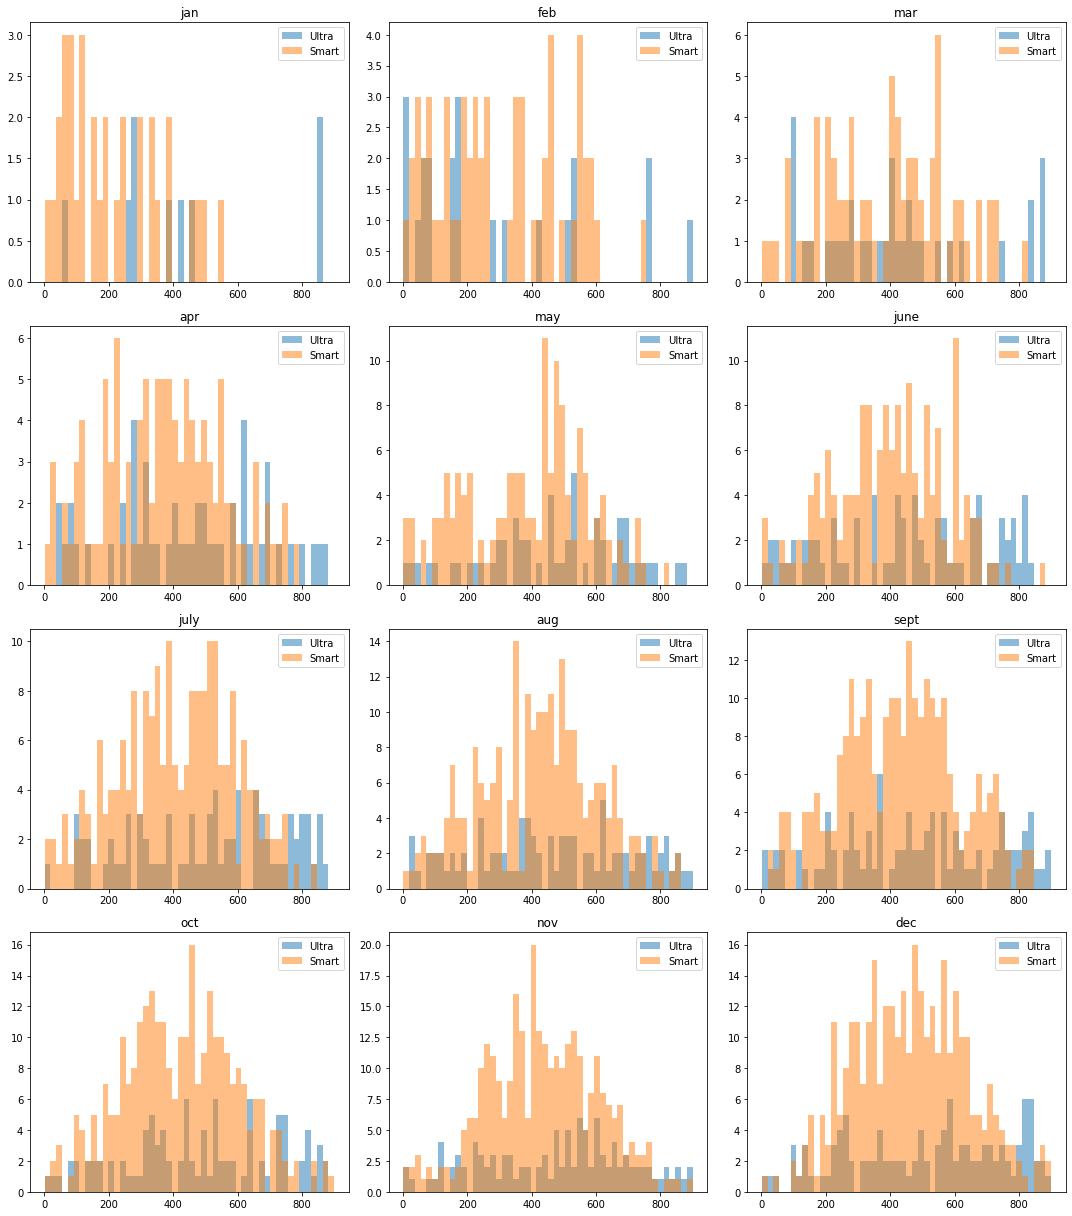

In [ ]:
fig_call, ax_call = plt.subplots(nrows=4, ncols=3, figsize=(15,17))

range_=(1,900)
bins=50
alpha=0.5

ax_call[0,0].hist(df_users[df_users['tariff']=='ultra']['calls_duration_01'], bins,range=range_, alpha=alpha,label='Ultra')
ax_call[0,0].hist(df_users[df_users['tariff']=='smart']['calls_duration_01'], bins,range=range_, alpha=alpha,label='Smart')

ax_call[0,1].hist(df_users[df_users['tariff']=='ultra']['calls_duration_02'], bins,range=range_, alpha=alpha,label='Ultra')
ax_call[0,1].hist(df_users[df_users['tariff']=='smart']['calls_duration_02'], bins,range=range_, alpha=alpha,label='Smart')

ax_call[0,2].hist(df_users[df_users['tariff']=='ultra']['calls_duration_03'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[0,2].hist(df_users[df_users['tariff']=='smart']['calls_duration_03'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[1,0].hist(df_users[df_users['tariff']=='ultra']['calls_duration_04'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[1,0].hist(df_users[df_users['tariff']=='smart']['calls_duration_04'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[1,1].hist(df_users[df_users['tariff']=='ultra']['calls_duration_05'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[1,1].hist(df_users[df_users['tariff']=='smart']['calls_duration_05'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[1,2].hist(df_users[df_users['tariff']=='ultra']['calls_duration_06'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[1,2].hist(df_users[df_users['tariff']=='smart']['calls_duration_06'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[2,0].hist(df_users[df_users['tariff']=='ultra']['calls_duration_07'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[2,0].hist(df_users[df_users['tariff']=='smart']['calls_duration_07'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[2,1].hist(df_users[df_users['tariff']=='ultra']['calls_duration_08'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[2,1].hist(df_users[df_users['tariff']=='smart']['calls_duration_08'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[2,2].hist(df_users[df_users['tariff']=='ultra']['calls_duration_09'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[2,2].hist(df_users[df_users['tariff']=='smart']['calls_duration_09'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[3,0].hist(df_users[df_users['tariff']=='ultra']['calls_duration_10'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[3,0].hist(df_users[df_users['tariff']=='smart']['calls_duration_10'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[3,1].hist(df_users[df_users['tariff']=='ultra']['calls_duration_11'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[3,1].hist(df_users[df_users['tariff']=='smart']['calls_duration_11'], bins,range=range_,alpha=alpha,label='Smart')

ax_call[3,2].hist(df_users[df_users['tariff']=='ultra']['calls_duration_12'], bins,range=range_,alpha=alpha,label='Ultra')
ax_call[3,2].hist(df_users[df_users['tariff']=='smart']['calls_duration_12'], bins,range=range_,alpha=alpha,label='Smart')

for i in range(4):
    for j in range(3):
        ax_call[i,j].set_title(months[i][j])
        ax_call[i,j].legend()
    
fig_call.tight_layout()

* для тарифа smart значения "минуты разговора" распределены нормально. это хорошо видно для месяцев декабрь, ноябрь, октябрь.
* для тарифа ultra распределение сильно не выражено. 

#### сообщения

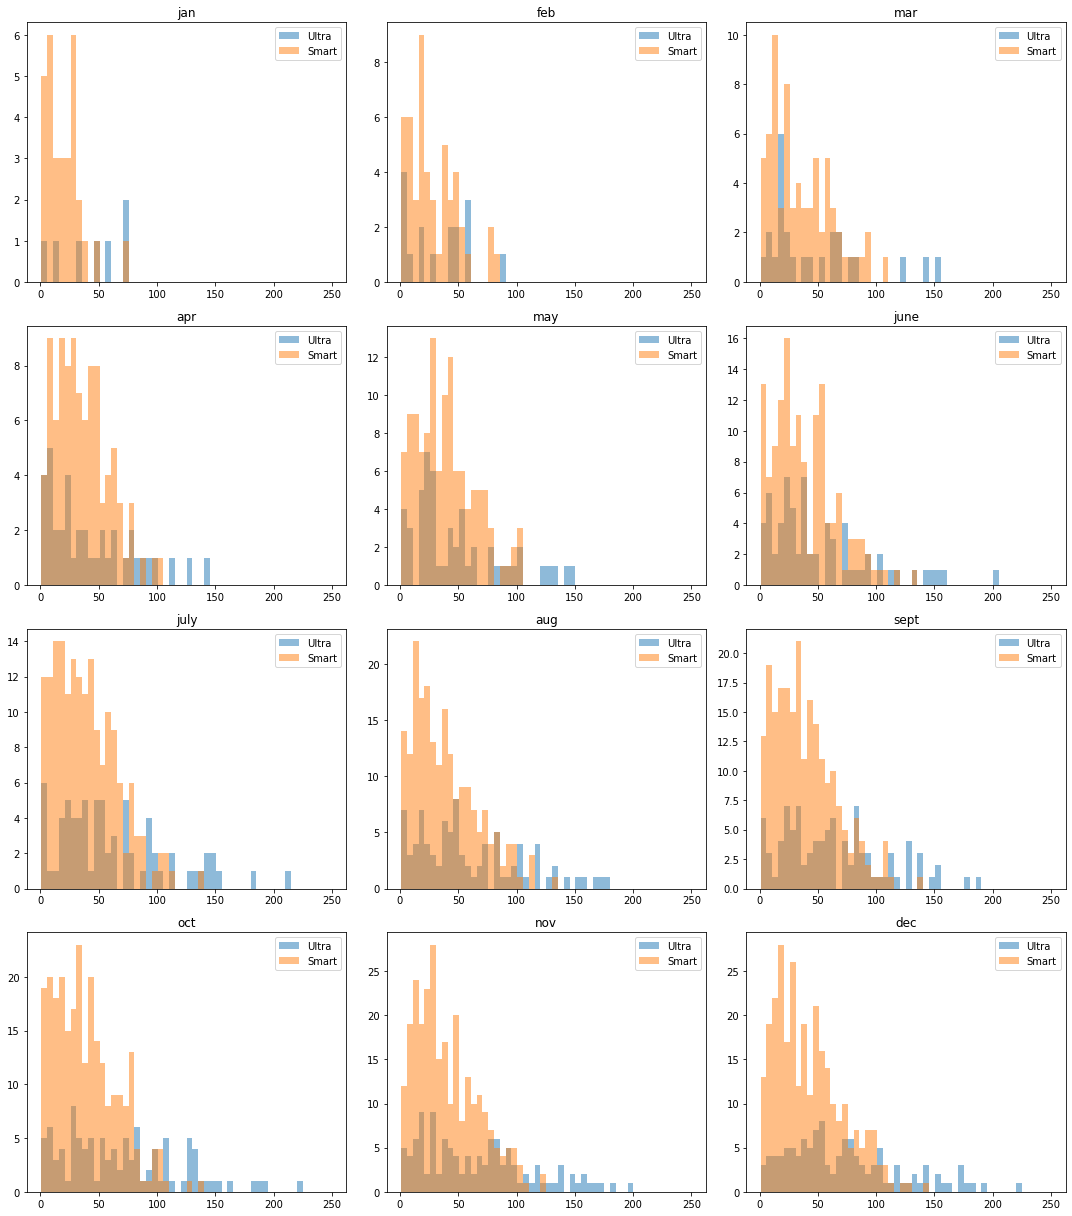

In [ ]:
fig_mess, ax_mess = plt.subplots(nrows=4, ncols=3, figsize=(15,17))

range_=(1,250)
bins=50
alpha=0.5

ax_mess[0,0].hist(df_users[df_users['tariff']=='ultra']['messages_count_01'], bins,range=range_, alpha=alpha,label='Ultra')
ax_mess[0,0].hist(df_users[df_users['tariff']=='smart']['messages_count_01'], bins,range=range_, alpha=alpha,label='Smart')

ax_mess[0,1].hist(df_users[df_users['tariff']=='ultra']['messages_count_02'], bins,range=range_, alpha=alpha,label='Ultra')
ax_mess[0,1].hist(df_users[df_users['tariff']=='smart']['messages_count_02'], bins,range=range_, alpha=alpha,label='Smart')

ax_mess[0,2].hist(df_users[df_users['tariff']=='ultra']['messages_count_03'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[0,2].hist(df_users[df_users['tariff']=='smart']['messages_count_03'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[1,0].hist(df_users[df_users['tariff']=='ultra']['messages_count_04'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[1,0].hist(df_users[df_users['tariff']=='smart']['messages_count_04'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[1,1].hist(df_users[df_users['tariff']=='ultra']['messages_count_05'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[1,1].hist(df_users[df_users['tariff']=='smart']['messages_count_05'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[1,2].hist(df_users[df_users['tariff']=='ultra']['messages_count_06'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[1,2].hist(df_users[df_users['tariff']=='smart']['messages_count_06'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[2,0].hist(df_users[df_users['tariff']=='ultra']['messages_count_07'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[2,0].hist(df_users[df_users['tariff']=='smart']['messages_count_07'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[2,1].hist(df_users[df_users['tariff']=='ultra']['messages_count_08'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[2,1].hist(df_users[df_users['tariff']=='smart']['messages_count_08'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[2,2].hist(df_users[df_users['tariff']=='ultra']['messages_count_09'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[2,2].hist(df_users[df_users['tariff']=='smart']['messages_count_09'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[3,0].hist(df_users[df_users['tariff']=='ultra']['messages_count_10'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[3,0].hist(df_users[df_users['tariff']=='smart']['messages_count_10'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[3,1].hist(df_users[df_users['tariff']=='ultra']['messages_count_11'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[3,1].hist(df_users[df_users['tariff']=='smart']['messages_count_11'], bins,range=range_,alpha=alpha,label='Smart')

ax_mess[3,2].hist(df_users[df_users['tariff']=='ultra']['messages_count_12'], bins,range=range_,alpha=alpha,label='Ultra')
ax_mess[3,2].hist(df_users[df_users['tariff']=='smart']['messages_count_12'], bins,range=range_,alpha=alpha,label='Smart')

for i in range(4):
    for j in range(3):
        ax_mess[i,j].set_title(months[i][j])
        ax_mess[i,j].legend()
    
fig_mess.tight_layout()

* Для тарифа smart и ultra значения имеют вид распределения Пуассона. Также наборы значений имеют положительную скошенность.

#### объём интернет-трафика

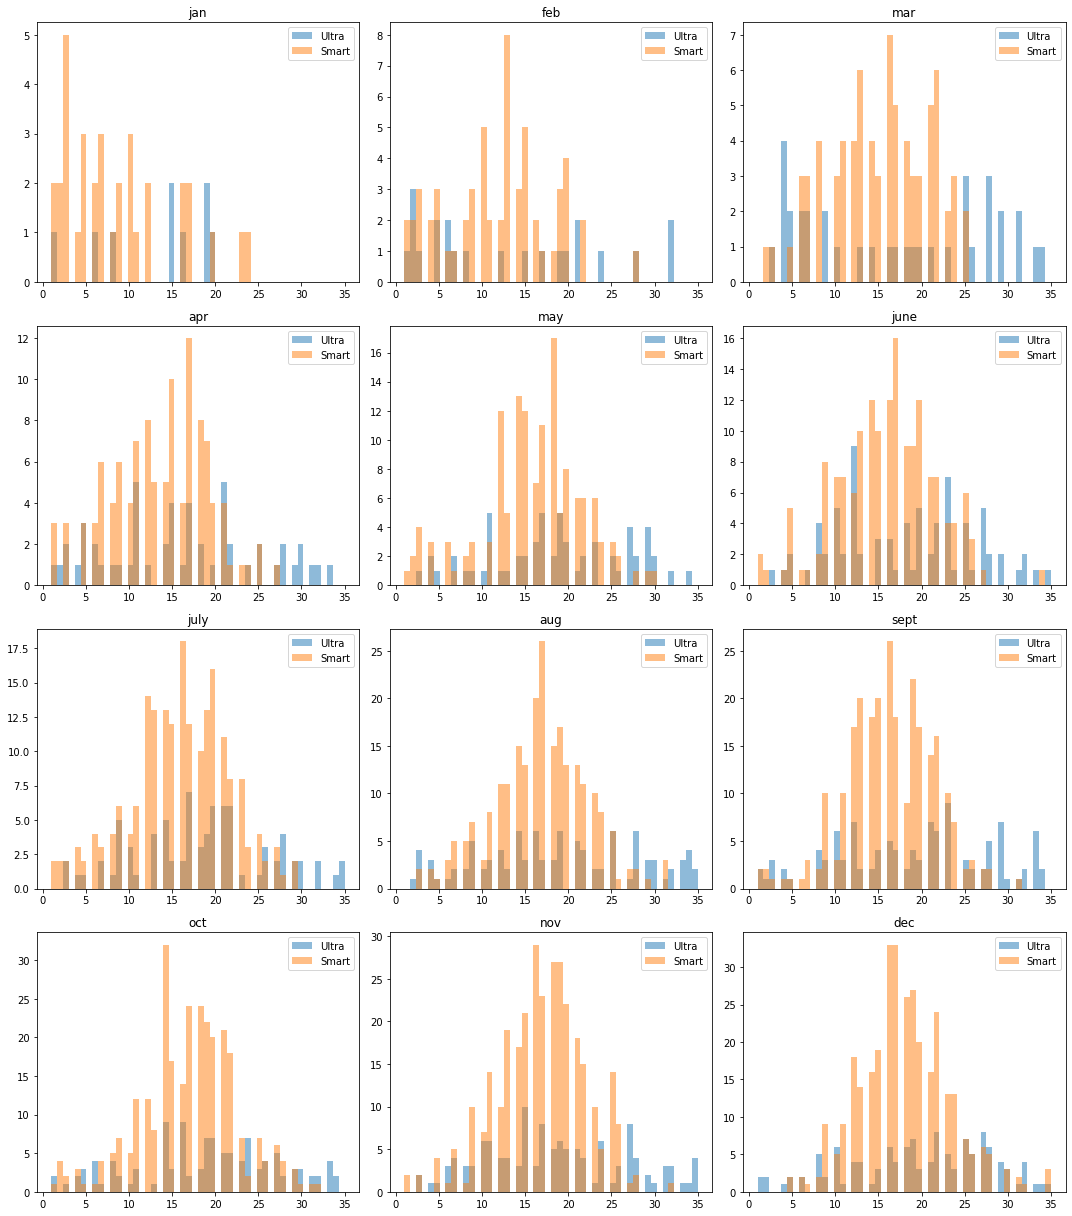

In [ ]:
fig_int, ax_int = plt.subplots(nrows=4, ncols=3, figsize=(15,17))

range_=(1,35)
bins=50
alpha=0.5

ax_int[0,0].hist(df_users[df_users['tariff']=='ultra']['internet_gb_01'], bins,range=range_, alpha=alpha,label='Ultra')
ax_int[0,0].hist(df_users[df_users['tariff']=='smart']['internet_gb_01'], bins,range=range_, alpha=alpha,label='Smart')

ax_int[0,1].hist(df_users[df_users['tariff']=='ultra']['internet_gb_02'], bins,range=range_, alpha=alpha,label='Ultra')
ax_int[0,1].hist(df_users[df_users['tariff']=='smart']['internet_gb_02'], bins,range=range_, alpha=alpha,label='Smart')

ax_int[0,2].hist(df_users[df_users['tariff']=='ultra']['internet_gb_03'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[0,2].hist(df_users[df_users['tariff']=='smart']['internet_gb_03'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[1,0].hist(df_users[df_users['tariff']=='ultra']['internet_gb_04'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[1,0].hist(df_users[df_users['tariff']=='smart']['internet_gb_04'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[1,1].hist(df_users[df_users['tariff']=='ultra']['internet_gb_05'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[1,1].hist(df_users[df_users['tariff']=='smart']['internet_gb_05'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[1,2].hist(df_users[df_users['tariff']=='ultra']['internet_gb_06'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[1,2].hist(df_users[df_users['tariff']=='smart']['internet_gb_06'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[2,0].hist(df_users[df_users['tariff']=='ultra']['internet_gb_07'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[2,0].hist(df_users[df_users['tariff']=='smart']['internet_gb_07'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[2,1].hist(df_users[df_users['tariff']=='ultra']['internet_gb_08'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[2,1].hist(df_users[df_users['tariff']=='smart']['internet_gb_08'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[2,2].hist(df_users[df_users['tariff']=='ultra']['internet_gb_09'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[2,2].hist(df_users[df_users['tariff']=='smart']['internet_gb_09'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[3,0].hist(df_users[df_users['tariff']=='ultra']['internet_gb_10'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[3,0].hist(df_users[df_users['tariff']=='smart']['internet_gb_10'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[3,1].hist(df_users[df_users['tariff']=='ultra']['internet_gb_11'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[3,1].hist(df_users[df_users['tariff']=='smart']['internet_gb_11'], bins,range=range_,alpha=alpha,label='Smart')

ax_int[3,2].hist(df_users[df_users['tariff']=='ultra']['internet_gb_12'], bins,range=range_,alpha=alpha,label='Ultra')
ax_int[3,2].hist(df_users[df_users['tariff']=='smart']['internet_gb_12'], bins,range=range_,alpha=alpha,label='Smart')

for i in range(4):
    for j in range(3):
        ax_int[i,j].set_title(months[i][j])
        ax_int[i,j].legend()
    
fig_int.tight_layout()

* для тарифа smart значения "минуты разговора" распределены нормально. это хорошо видно для месяцев декабрь, ноябрь, октябрь.
* для тарифа ultra распределение сильно не выражено. 

#### Сравним данные за год

минуты разговора: гистограммы и даграммы размаха

In [ ]:
df_users['calls_duration_mean'] = df_users[columns_calls_duration].mean(axis=1)

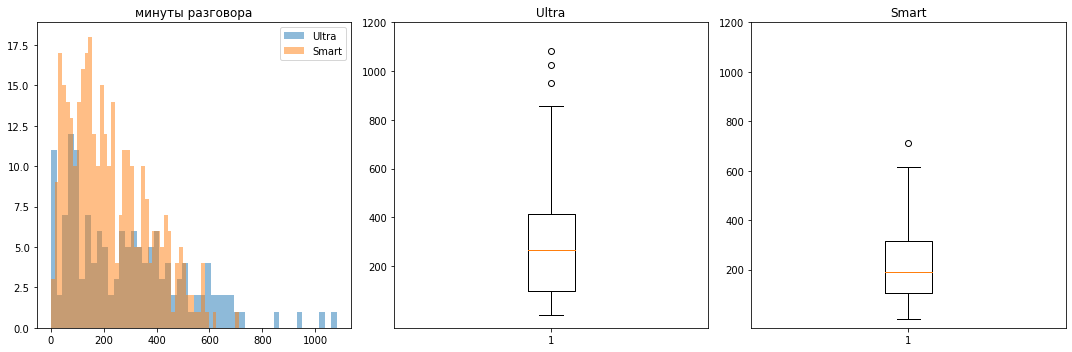

In [ ]:
fig_y_c, ax_y_c = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax_y_c[0].hist(df_users[df_users['tariff']=='ultra']['calls_duration_mean'], bins, alpha=alpha,label='Ultra')
ax_y_c[0].hist(df_users[df_users['tariff']=='smart']['calls_duration_mean'], bins, alpha=alpha,label='Smart')
ax_y_c[0].set_title('минуты разговора')
ax_y_c[0].legend()

ax_y_c[1].boxplot(df_users[df_users['tariff']=='ultra']['calls_duration_mean'])
ax_y_c[1].set_title('Ultra')
ax_y_c[1].set_yticks([200, 400, 600, 800, 1000,1200])

ax_y_c[2].boxplot(df_users[df_users['tariff']=='smart']['calls_duration_mean'])
ax_y_c[2].set_title('Smart')
ax_y_c[2].set_yticks([200, 400, 600, 800, 1000,1200])

fig_y_c.tight_layout()

кол-во сообщений: гистограммы и даграммы размаха

In [ ]:
df_users['columns_messages_mean'] = df_users[columns_messages_count].mean(axis=1)

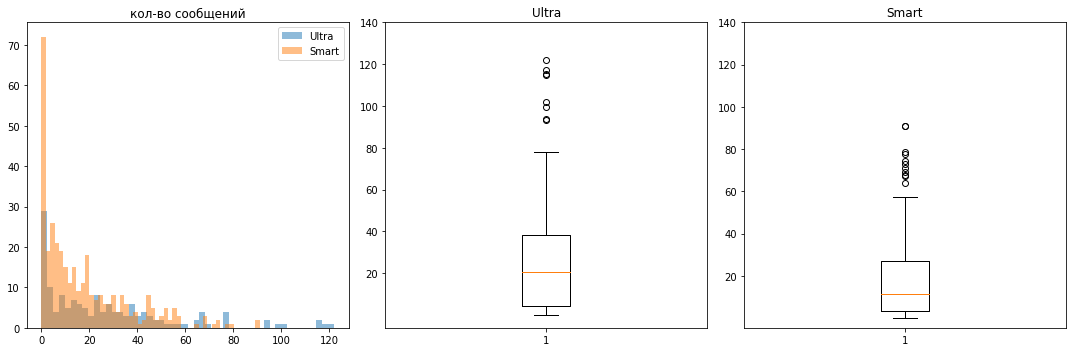

In [ ]:
fig_y_m, ax_y_m = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax_y_m[0].hist(df_users[df_users['tariff']=='ultra']['columns_messages_mean'], bins, alpha=alpha,label='Ultra')
ax_y_m[0].hist(df_users[df_users['tariff']=='smart']['columns_messages_mean'], bins, alpha=alpha,label='Smart')
ax_y_m[0].set_title('кол-во сообщений')
ax_y_m[0].legend()

ax_y_m[1].boxplot(df_users[df_users['tariff']=='ultra']['columns_messages_mean'])
ax_y_m[1].set_title('Ultra')
ax_y_m[1].set_yticks([20, 40, 60, 80, 100, 120, 140])

ax_y_m[2].boxplot(df_users[df_users['tariff']=='smart']['columns_messages_mean'])
ax_y_m[2].set_title('Smart')
ax_y_m[2].set_yticks([20, 40, 60, 80, 100, 120, 140])

fig_y_m.tight_layout()

интернет-трафик: гистограммы и даграммы размаха

In [ ]:
df_users['columns_internet_gb_mean'] = df_users[columns_internet_gb].mean(axis=1)

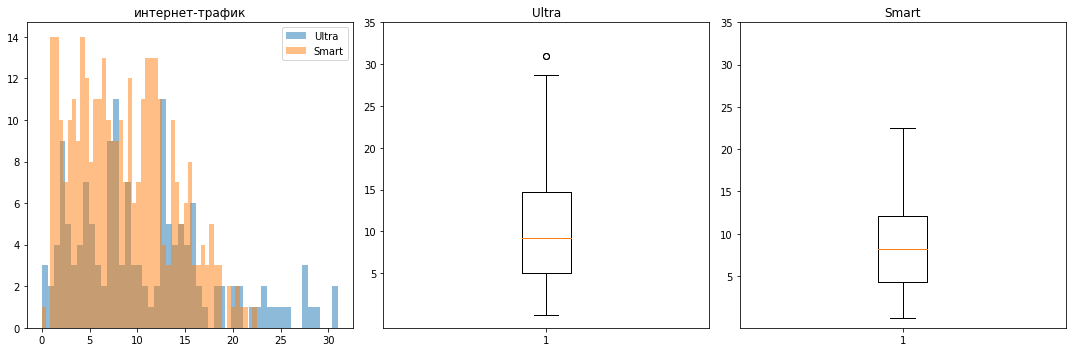

In [ ]:
fig_y_i, ax_y_i = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax_y_i[0].hist(df_users[df_users['tariff']=='ultra']['columns_internet_gb_mean'], bins, alpha=alpha,label='Ultra')
ax_y_i[0].hist(df_users[df_users['tariff']=='smart']['columns_internet_gb_mean'], bins, alpha=alpha,label='Smart')
ax_y_i[0].set_title('интернет-трафик')
ax_y_i[0].legend()

ax_y_i[1].boxplot(df_users[df_users['tariff']=='ultra']['columns_internet_gb_mean'])
ax_y_i[1].set_title('Ultra')
ax_y_i[1].set_yticks([5, 10, 15, 20, 25, 30, 35])

ax_y_i[2].boxplot(df_users[df_users['tariff']=='smart']['columns_internet_gb_mean'])
ax_y_i[2].set_title('Smart')
ax_y_i[2].set_yticks([5, 10, 15, 20, 25, 30, 35])

fig_y_i.tight_layout()

### Выручка за год

<div class="alert alert-info">
добавил небольшое сравнение выручек за год
</div>

In [ ]:
rev_y_s = df_users.loc[df_users['tariff']=='smart'][columns_revenue].sum(axis=1).sum()
rev_y_u = df_users.loc[df_users['tariff']=='ultra'][columns_revenue].sum(axis=1).sum()
if rev_y_s > rev_y_u:
    print('Суммарная выручка для тарифа Смарт больше чем Ультра в', int(rev_y_s//rev_y_u), 'раза')
elif rev_y_s < rev_y_u:
    print('Суммарная выручка для тарифа Ультра больше чем Смарт в', int(rev_y_u//rev_y_s), 'раза')
else:
    print('Выручка для тарифов Ультра и Смарт совпадают! :)))')

Суммарная выручка для тарифа Смарт больше чем Ультра в 2 раза


---
## Шаг 4. Проверим гипотезы

создаем столбец со средней вырочкой по каждому пользователю

In [ ]:
df_users['revenue_mean']=df_users[columns_revenue].mean(axis=1)
df_users['revenue_mean'].head()

0    1950.000000
1     650.000000
2    1583.333333
3    1950.000000
4    1950.000000
Name: revenue_mean, dtype: float64

установим критический уровень статистической значимости

In [ ]:
alpha = .05 

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

* Нулевая гипотеза H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» **совпадают**
* Альтернативная гипотеза H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» **различаются**

#### рассчитаем среднее

средняя выручка тарифа Смарт

In [ ]:
df_users.loc[df_users['tariff']=='smart']['revenue_mean'].mean()

2124.209401709402

средняя выручка тарифа Ультра

In [ ]:
df_users.loc[df_users['tariff']=='ultra']['revenue_mean'].mean()

2213.9261744966443

#### рассчитаем дисперсии для тарифов

In [ ]:
np.var(df_users.loc[df_users['tariff']=='smart']['revenue_mean'])

3483585.5722082206

In [ ]:
np.var(df_users.loc[df_users['tariff']=='ultra']['revenue_mean'])

565219.2328048287

дисперсии отличаются, установим equal_var = False

#### проверка гипотезы

In [ ]:
rev_smart = df_users.loc[df_users['tariff']=='smart']['revenue_mean']
rev_ultra = df_users.loc[df_users['tariff']=='ultra']['revenue_mean']

In [ ]:
results = st.ttest_ind(rev_smart, rev_ultra, equal_var = False)
print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.4449370655987607
Не получилось отвергнуть нулевую гипотезу


### средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

* Нулевая гипотеза H0: средняя выручка пользователей из Москвы **совпадает** с выручкой пользователей из других регионов
* Альтернативная гипотеза H1: средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов

#### расчитаем среднее

средняя выручка пользователей из Москвы

In [ ]:
df_users.loc[df_users['city']=='Москва']['revenue_mean'].mean()

1988.176767676768

средняя выручка пользователей из других регионов

In [ ]:
df_users.loc[df_users['city']!='Москва']['revenue_mean'].mean()

2191.1296758104736

#### рассчитаем дисперсии для тарифов для параметра equal_var

In [ ]:
np.var(df_users.loc[df_users['city']=='Москва']['revenue_mean'])

2140790.279780125

In [ ]:
np.var(df_users.loc[df_users['city']!='Москва']['revenue_mean'])

2724662.0678336713

дисперсии можно считать близкими , установим equal_var = True

#### проверка гипотезы

In [ ]:
rev_smart_moscow = df_users.loc[df_users['city']=='Москва']['revenue_mean']
rev_smart_others = df_users.loc[df_users['city']!='Москва']['revenue_mean']

In [ ]:
results = st.ttest_ind(rev_smart_moscow, rev_smart_others)
print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2643847358317267
Не получилось отвергнуть нулевую гипотезу


---
## Шаг 5. Общий вывод

**Обзор проведенной работы**: В работе был проведен предварительный анализ тарифов «Смарт» и «Ультра» на небольшой выборке клиентов. 
* изучены имеющиеся данные:  файлы содержат информацию по 500 пользователям (кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил)
* проведена предобработка данных: 
 * перевод строки в дату и время
 * округление в соответсвии с правилами тарифа
 * расчитаны для каждого пользователя помесячное кол-во времени звонков, сообщений и интернет трафика
 * расчитана помесячная выручка
 * выявлено большое кол-во нулевых значений
* анализ данных содержит:
 * расчет по каждому тарифу среднее количество, дисперсию и стандартное отклонение по месяцам 
 * построены гистограммы сравнения тарифов по каждому месяцу (нормальное расспределение для минут разговора и трафика, распределение Пуассона для кол-ва сообщений)
 * построены гистограммы и диаграммы размаха по агрегированным данным за год (тяготеют к распределению Пуассона). 
* проведена проверка гипотез:
 * средняя выручка пользователи из Москвы совпадает с выручки пользователей из других регионов - Не получилось отвергнуть нулевую гипотезу
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадают - Не получилось отвергнуть нулевую гипотезу

**Основной вывод**: 
* проверка гипотез показала:
 * оба тарифа «Смарт» и «Ультра» приносят в среднем одинаковую выручку
 * Москва и регионы дают в среднем одинаковую выручку
* Суммарная выручка за год для тарифа Смарт больше чем Ультра в 2 раза
* присутствуют выбросы в виде нулевых значений. необходимо выяснить причину отсутствия информации.